<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/Graph1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

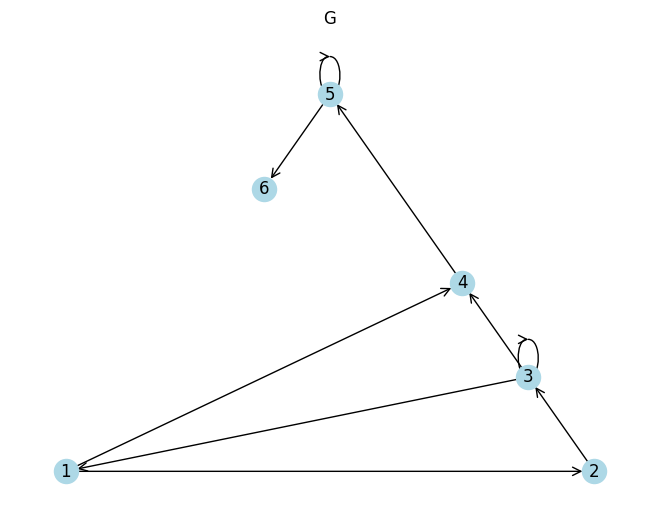

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# ایجاد گراف جهت‌دار
G = nx.DiGraph()

# رئوس
vertices = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(vertices)

# یال‌ها
edges = [
    (1, 2), (2, 3), (3, 1),
    (1, 4), (4, 5), (5, 6),(5,5),(3,3),
    (3, 4)
]
G.add_edges_from(edges)

# رسم گراف
pos = nx.planar_layout(G)  # چینش مسطح
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        arrows=True, arrowstyle='->', arrowsize=15)
plt.title("G")
plt.show()

In [2]:
import numpy as np


adj_matrix = np.zeros((6, 6), dtype=int)

# پر کردن ماتریس بر اساس یال‌ها
for (u, v) in edges:
    adj_matrix[u-1][v-1] = 1

# نمایش ماتریس
print("ماتریس مجاورت گراف:")
print(adj_matrix)

ماتریس مجاورت گراف:
[[0 1 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 1 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]]


In [3]:

# محاسبه درجه خروجی هر راس
out_degree = {v: 0 for v in vertices}
for (u, v) in edges:
    out_degree[u] += 1

# ایجاد ماتریس انتقال (۶x۶)
P = np.zeros((6, 6))

# پر کردن ماتریس انتقال
for (u, v) in edges:
    P[u-1][v-1] = 1 / out_degree[u]  # چون پایتون ایندکس از ۰ شروع می‌شود

# نمایش ماتریس انتقال
print("ماتریس انتقال (P):")
print(P)

ماتریس انتقال (P):
[[0.         0.5        0.         0.5        0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.         0.         0.        ]]


In [4]:
# 1. Define P_alpha matrix (6-node graph)
import numpy as np


alpha = 0.85
n = 6


# ماتریس اتصال یکنواخت (Teleportation)
teleport = np.ones((n, n)) / n

# محاسبه ماتریس Pα
P_alpha = alpha * P + (1 - alpha) * teleport

# نمایش ماتریس Pα
print(f"ماتریس انتقال پیج رنک (P_alpha) با آلفا = {alpha}:")
print(np.round(P_alpha, 4))

ماتریس انتقال پیج رنک (P_alpha) با آلفا = 0.85:
[[0.025  0.45   0.025  0.45   0.025  0.025 ]
 [0.025  0.025  0.875  0.025  0.025  0.025 ]
 [0.3083 0.025  0.3083 0.3083 0.025  0.025 ]
 [0.025  0.025  0.025  0.025  0.875  0.025 ]
 [0.025  0.025  0.025  0.025  0.45   0.45  ]
 [0.025  0.025  0.025  0.025  0.025  0.025 ]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig

In [6]:
# 2. Compute original eigenvalues
original_evals, _ = eig(P_alpha)
original_evals = np.sort(original_evals)[::-1]  # Sort descending

# 3. Generate 50 random non-zero polynomials
def generate_polynomials(num_polys=50, degree=6):
    polynomials = []
    while len(polynomials) < num_polys:
        coeffs = np.random.randint(0, 2, size=degree+1)
        if np.any(coeffs != 0):  # Ensure at least one non-zero coefficient
            polynomials.append(coeffs)
    return polynomials

polynomials = generate_polynomials()

In [8]:
# 4. Compute eigenvalues for all h(P_alpha)
all_eigenvalues = []
for i, coeffs in enumerate(polynomials):
    try:
        # Build h(P_alpha) matrix
        hP = sum(c * np.linalg.matrix_power(P_alpha, p)
                 for p, c in enumerate(coeffs) if c != 0)

        # Ensure hP is at least 2D
        if np.isscalar(hP):
            hP = np.array([[hP]])

        evals, _ = eig(hP)
        all_eigenvalues.append(np.sort(evals)[::-1])  # Sort descending

    except Exception as e:
        print(f"Error with polynomial {i+1} ({coeffs}): {str(e)}")
        all_eigenvalues.append(np.zeros_like(original_evals))  # Fallback


In [9]:
# 5. Prepare data for heatmap
eigen_matrix = np.array([original_evals] + all_eigenvalues)

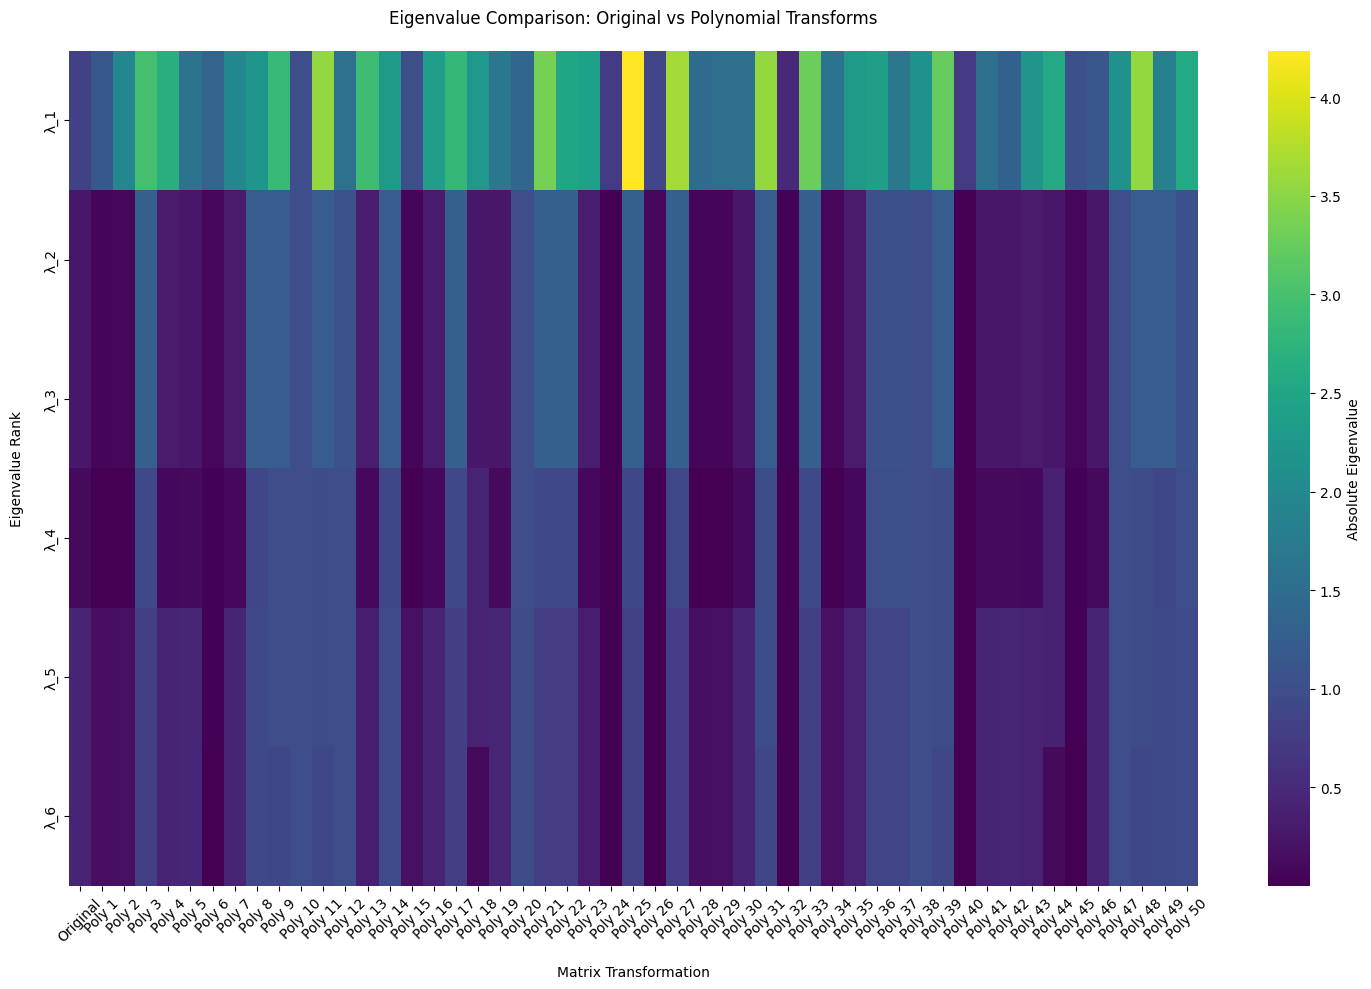


Eigenvalue Stability Analysis:
Original λ_max: 0.8256
Average transformed λ_max: 2.0999
Max deviation: 3.4088


In [10]:

# 6. Create heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    np.abs(eigen_matrix.T),
    cmap="viridis",
    annot=False,
    yticklabels=[f"λ_{i+1}" for i in range(6)],
    xticklabels=["Original"] + [f"Poly {i+1}" for i in range(50)],
    cbar_kws={'label': 'Absolute Eigenvalue'}
)
plt.title("Eigenvalue Comparison: Original vs Polynomial Transforms", pad=20)
plt.xlabel("Matrix Transformation", labelpad=15)
plt.ylabel("Eigenvalue Rank", labelpad=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Statistical comparison
print("\nEigenvalue Stability Analysis:")
print(f"Original λ_max: {np.max(np.abs(original_evals)):.4f}")
print(f"Average transformed λ_max: {np.mean([np.max(np.abs(evals)) for evals in all_eigenvalues]):.4f}")
print(f"Max deviation: {np.max(np.abs(eigen_matrix[1:] - original_evals)):.4f}")

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig
from matplotlib.colors import ListedColormap


In [16]:
# 1. Main matrix P_alpha

# 2. Compute original eigenvalues
original_evals, _ = eig(P_alpha)
original_evals_sorted = np.sort(original_evals)[::-1]  # Sort in descending order

# 3. Generate 50 random polynomials (for visual clarity)
def generate_polynomials(num_polys=50, degree=6):
    polynomials = []
    while len(polynomials) < num_polys:
        coeffs = np.random.randint(0, 2, size=degree+1)
        if np.any(coeffs != 0):  # Ensure it's a non-zero polynomial
            polynomials.append(coeffs)
    return polynomials

polynomials = generate_polynomials()

In [17]:
# 4. Compute eigenvalues for all polynomials
all_eigenvalues = []
for coeffs in polynomials:
    # Create the polynomial matrix h(P)
    hP = sum(c * np.linalg.matrix_power(P_alpha, p)
             for p, c in enumerate(coeffs) if c != 0)
    evals, _ = eig(hP)
    all_eigenvalues.append(np.sort(evals)[::-1])  # Sort in descending order


In [18]:
# 5. Create color palette for each original eigenvalue
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF']  # Red, Green, Blue, Yellow, Purple, Cyan
cmap = ListedColormap(colors)

# 6. Prepare data for heatmap
data = np.zeros((6, len(polynomials)+1))  # 6 eigenvalues × (20 polynomials + 1 original)

# First column: original eigenvalues
data[:, 0] = np.arange(6)  # Each eigenvalue gets a unique number

# Remaining columns: match to closest original eigenvalue
for i, evals in enumerate(all_eigenvalues, 1):
    for j, eval_new in enumerate(evals):
        # Find the closest original eigenvalue
        closest_idx = np.argmin(np.abs(eval_new - original_evals_sorted))
        data[j, i] = closest_idx

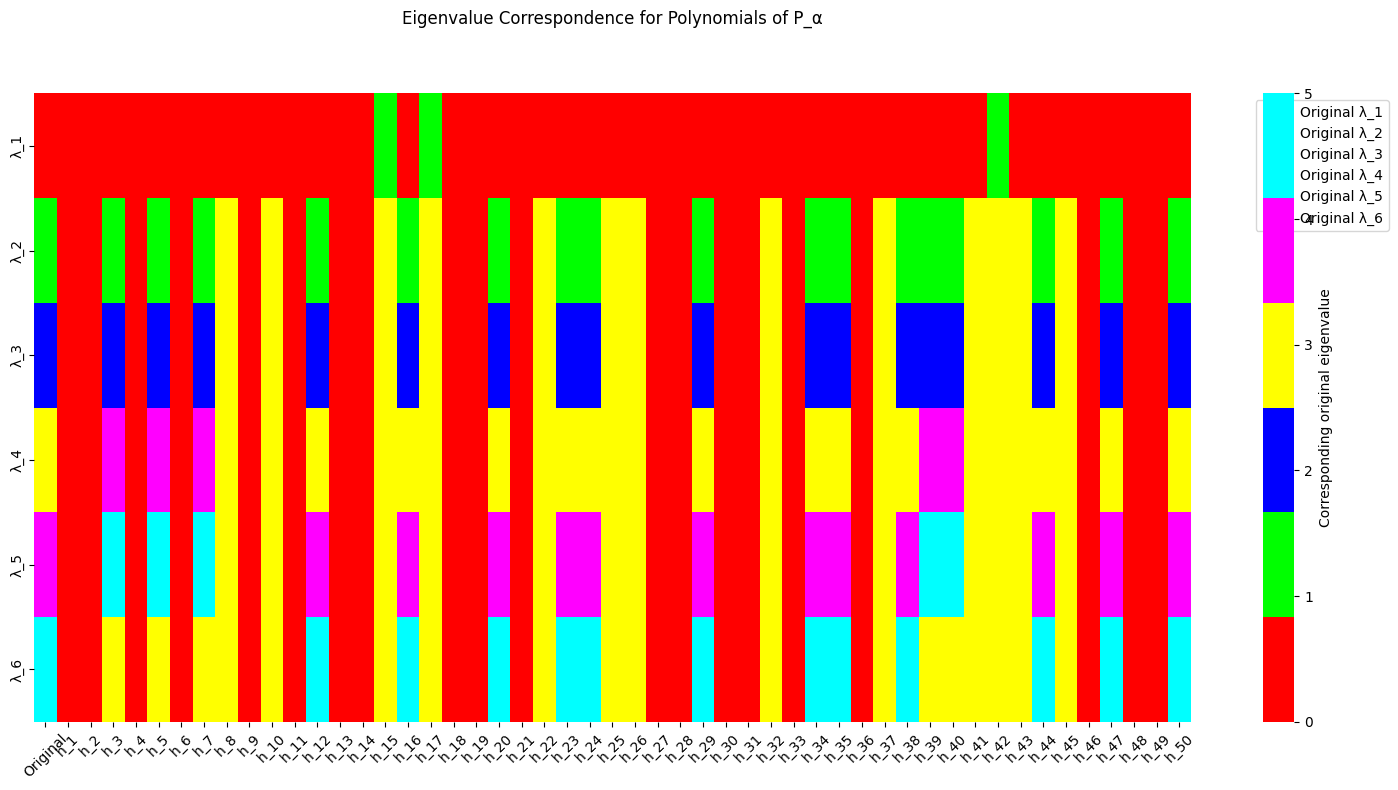

In [20]:
# 7. Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    data,
    cmap=cmap,
    annot=False,
    yticklabels=[f"λ_{i+1}" for i in range(6)],
    xticklabels=["Original"] + [f"h_{i+1}" for i in range(len(polynomials))],
    cbar_kws={'label': 'Corresponding original eigenvalue'}
)



# 8. Add titles and labels
plt.title("Eigenvalue Correspondence for Polynomials of P_α", pad=50)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.tight_layout()

# 9. Add color legend
legend_elements = [plt.Line2D([0], [0], marker='s', color='w', label=f'Original λ_{i+1}',
                    markerfacecolor=colors[i], markersize=10) for i in range(6)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
